<a href="https://colab.research.google.com/github/smriddhii/Projects/blob/main/Estimating_a_risk_factor_model_for_a_stock_with_live_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = '1926-01-01'

In [4]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq= 'M', start = start).read()

In [6]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-03    2.51 -5.51 -8.85  0.36
 2023-04    0.61 -3.35 -0.04  0.35
 2023-05    0.35  1.61 -7.72  0.36
 2023-06    6.46  1.54 -0.26  0.40
 2023-07    3.21  2.07  4.13  0.45
 
 [1165 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.16  -9.67  1.83
 2019   28.28  -6.14 -10.46  2.15
 2020   23.66  13.18 -46.67  0.45
 2021   23.56  -3.89  25.49  0.04
 2022  -21.60  -6.95  25.81  1.43
 
 [96 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [7]:
ff_df = ff[0]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

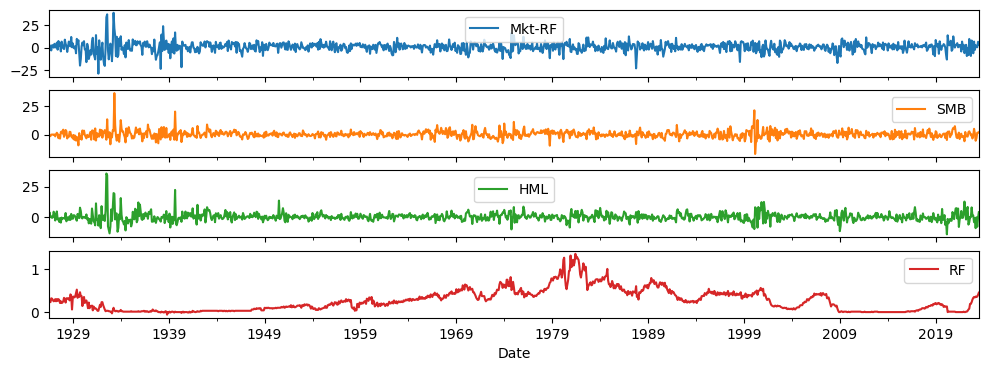

In [8]:
ff_df.plot(subplots = True, figsize = (12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

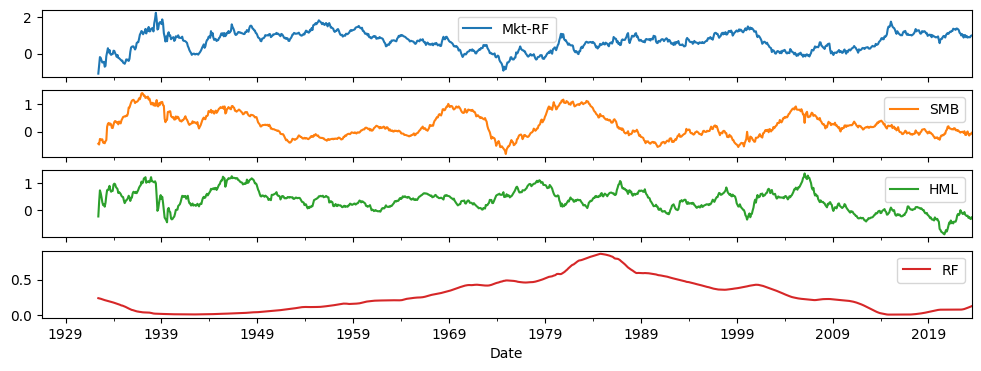

In [9]:
ff_df.rolling(72).mean().plot(subplots = True, figsize = (12,4))

In [10]:
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq = 'M', start = start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

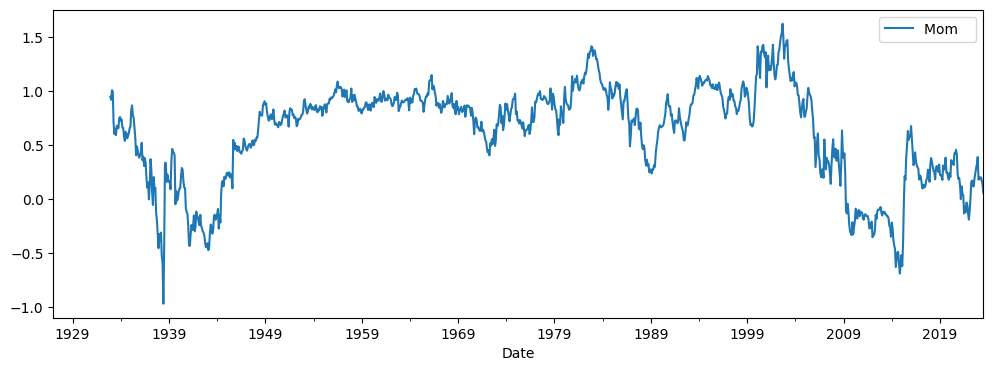

In [11]:
ff_mom_df.rolling(72).mean().plot(subplots = True, figsize = (12,4))

In [13]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-03,2.51,-5.51,-8.85,0.36
2023-04,0.61,-3.35,-0.04,0.35
2023-05,0.35,1.61,-7.72,0.36


In [14]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2023-03,-2.49
2023-04,1.63
2023-05,-0.63


In [72]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on = 'Date', how = 'inner', sort = True, copy = True, indicator = False, validate= 'one_to_one')

In [73]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-03,2.51,-5.51,-8.85,0.36,-2.49
2023-04,0.61,-3.35,-0.04,0.35,1.63
2023-05,0.35,1.61,-7.72,0.36,-0.63


In [20]:
AAPL_df = pdr.data.get_data_yahoo('AAPL', start = start)['Adj Close'].resample('M').ffill().pct_change()

TypeError: ignored

In [21]:
!pip install yfinance

In [22]:
import yfinance as yf
yf.pdr_override()

In [26]:
AAPL_data = pdr.data.get_data_yahoo('AAPL', start = start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [28]:
AAPL_df = AAPL_data.to_frame()

In [36]:
AAPL_df

,Adj Close,str_date,dt_date
Date,,,
1980-12-31,NaN,1980-12-31,1980 - 12
1981-01-31,-0.172163,1981-01-31,1981 - 01
1981-02-28,-0.061943,1981-02-28,1981 - 02
1981-03-31,-0.075475,1981-03-31,1981 - 03
1981-04-30,0.158162,1981-04-30,1981 - 04
...,...,...,...
2023-05-31,0.046058,2023-05-31,2023 - 05
2023-06-30,0.094330,2023-06-30,2023 - 06
2023-07-31,0.012785,2023-07-31,2023 - 07


In [37]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [38]:
ffac_merged_df.index.dtype

period[M]

In [40]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y - %m')


In [35]:
AAPL_df.dt_date.dtype

dtype('O')

In [76]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y - %m')

In [77]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom,str_date,dt_date
Date,,,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36,1927-01,1927 - 01
1927-02,4.18,0.04,2.94,0.26,-2.14,1927-02,1927 - 02
1927-03,0.13,-1.65,-2.61,0.30,3.61,1927-03,1927 - 03
1927-04,0.46,0.30,0.81,0.25,4.30,1927-04,1927 - 04
1927-05,5.44,1.53,4.73,0.30,3.00,1927-05,1927 - 05
...,...,...,...,...,...,...,...
2023-03,2.51,-5.51,-8.85,0.36,-2.49,2023-03,2023 - 03
2023-04,0.61,-3.35,-0.04,0.35,1.63,2023-04,2023 - 04
2023-05,0.35,1.61,-7.72,0.36,-0.63,2023-05,2023 - 05


In [79]:
AAPL_ffac_merged_df = pd.merge(AAPL_df, ffac_merged_df, how = 'inner', on = 'dt_date', sort= True, copy = True, indicator = False, validate = 'one_to_one')

In [95]:
AAPL_ffac_merged_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981 - 01,-5.04,2.92,6.72,1.04,-7.95,-18.256330
2,-0.061943,1981 - 02,0.57,-0.34,1.02,1.07,-1.35,-7.264323
3,-0.075475,1981 - 03,3.56,3.54,0.64,1.21,0.74,-8.757491
4,0.158162,1981 - 04,-2.11,4.40,2.28,1.08,-0.91,14.736228
5,0.167398,1981 - 05,0.11,2.00,-0.42,1.15,3.70,15.589822
...,...,...,...,...,...,...,...,...
507,0.118649,2023 - 03,2.51,-5.51,-8.85,0.36,-2.49,11.504858
508,0.028987,2023 - 04,0.61,-3.35,-0.04,0.35,1.63,2.548731
509,0.046058,2023 - 05,0.35,1.61,-7.72,0.36,-0.63,4.245831
510,0.094330,2023 - 06,6.46,1.54,-0.26,0.40,-2.39,9.033002


In [81]:
AAPL_ffac_merged_df.drop(columns = ['str_date_x', 'str_date_y'], inplace = True)

In [82]:
AAPL_ffac_merged_df.rename(columns = {'Adj Close' : 'AAPL'}, inplace = True)

In [83]:
AAPL_ffac_merged_df['AAPL_RF'] = AAPL_ffac_merged_df['AAPL']*100 - AAPL_ffac_merged_df['RF']

In [86]:
AAPL_ffac_merged_df.dropna(axis = 0,inplace = True)

In [96]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merged_df['AAPL_RF'], AAPL_ffac_merged_df[['Mkt-RF', 'SMB', 'HML', 'Mom']], missing = 'drop').fit()

In [97]:
AAPL_ffac_merged_df.rename(columns = {'Mom   ' : 'Mom'}, inplace = True)

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.293
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              52.52
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                    5.13e-37
Time:                        05:41:34   Log-Likelihood:                         -1946.8
No. Observations:                 511   AIC:                                      3902.
Df Residuals:                     507   BIC:                                      3918.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2734      0.114     11.197      0.000       1.050       1.497
SMB            0.2236      0.170      1.317      0.189      -0.110       0.557
HML           -0.8244      0.163     -5.070      0.000      -1.144      -0.505
Mom           -0.0441      0.115     -0.385      0.701      -0.269       0.181
==============================================================================
Omnibus:                       15.932   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.111
Skew:                          -0.053   Prob(JB):                     3.92e-08
Kurtosis:                       4.261   Cond. No.                         1.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
import statsmodels.tools
AAPL_ffac_merged_df_c = statsmodels.tools.add_constant(AAPL_ffac_merged_df, prepend = True)

In [101]:
AAPL_ffac_merged_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,1.0,-0.172163,1981 - 01,-5.04,2.92,6.72,1.04,-7.95,-18.256330
2,1.0,-0.061943,1981 - 02,0.57,-0.34,1.02,1.07,-1.35,-7.264323
3,1.0,-0.075475,1981 - 03,3.56,3.54,0.64,1.21,0.74,-8.757491
4,1.0,0.158162,1981 - 04,-2.11,4.40,2.28,1.08,-0.91,14.736228
5,1.0,0.167398,1981 - 05,0.11,2.00,-0.42,1.15,3.70,15.589822
...,...,...,...,...,...,...,...,...,...
507,1.0,0.118649,2023 - 03,2.51,-5.51,-8.85,0.36,-2.49,11.504858
508,1.0,0.028987,2023 - 04,0.61,-3.35,-0.04,0.35,1.63,2.548731
509,1.0,0.046058,2023 - 05,0.35,1.61,-7.72,0.36,-0.63,4.245831
510,1.0,0.094330,2023 - 06,6.46,1.54,-0.26,0.40,-2.39,9.033002


In [103]:
results = OLS(AAPL_ffac_merged_df_c['AAPL_RF'], AAPL_ffac_merged_df_c[['const', 'Mkt-RF', 'SMB', 'HML', 'Mom']], missing = 'drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     51.05
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           4.14e-36
Time:                        05:46:17   Log-Likelihood:                -1942.7
No. Observations:                 511   AIC:                             3895.
Df Residuals:                     506   BIC:                             3917.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4213      0.497      2.857      0.004       0.444       2.399
Mkt-RF         1.2076      0.115     10.477      0.000       0.981       1.434
SMB            0.2187      0.169      1.296      0.195      -0.113       0.550
HML           -0.8936      0.163     -5.472      0.000      -1.214      -0.573
Mom           -0.0999      0.115     -0.865      0.387      -0.327       0.127
==============================================================================
Omnibus:                       15.209   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.758
Skew:                          -0.050   Prob(JB):                     1.27e-07
Kurtosis:                       4.217   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""